#PET FINDER
UFUK CEM BIRBIRI

Data Science & Artificial Intelligence Master

Universite Cote d'Azur, France




This notebook is about data analysis of an animal shelter where we predict if the animals you have in your possession can be adopted within 30 days or not.

The dataset contains information about cats and dogs with other features like breed, fee, gender, color...
Lets's load the dataset and investigate some features:


In [1]:
#Some imports
import os
from tqdm import tqdm
import warnings
warnings.filterwarnings("ignore")
import ssl
ssl._create_default_https_context = ssl._create_unverified_context
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline

path = "https://www.i3s.unice.fr/~riveill/dataset/petfinder-adoption-prediction/"

colors = pd.read_csv(path+'color_labels.csv')
states = pd.read_csv(path+'state_labels.csv')
breeds = pd.read_csv(path+'breed_labels.csv')
#LOAD TRAIN DATA
train =  pd.read_csv(path+'train.csv')
train['dataset_type'] = 'train'

#LOAD TEST DATA
test = pd.read_csv(path+"test.csv")
test['dataset_type'] = 'test'
y_test = test['target']
X_test = test.drop(['target','dataset_type'], axis=1)

#All data
all_data = pd.concat([train,test])

See the columns of the dataset:

In [2]:
train.columns

Index(['Type', 'Age', 'Gender', 'Color1', 'Color2', 'Color3', 'MaturitySize',
       'FurLength', 'Vaccinated', 'Dewormed', 'Sterilized', 'Health', 'Fee',
       'Description', 'Images', 'Breed', 'target', 'dataset_type'],
      dtype='object')

See the size of the dataset and data types:

In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8168 entries, 0 to 8167
Data columns (total 18 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Type          8168 non-null   object 
 1   Age           8168 non-null   float64
 2   Gender        8168 non-null   object 
 3   Color1        8168 non-null   object 
 4   Color2        8168 non-null   object 
 5   Color3        8168 non-null   object 
 6   MaturitySize  8168 non-null   object 
 7   FurLength     8168 non-null   object 
 8   Vaccinated    8168 non-null   object 
 9   Dewormed      8168 non-null   object 
 10  Sterilized    8168 non-null   object 
 11  Health        8168 non-null   object 
 12  Fee           8168 non-null   float64
 13  Description   8168 non-null   object 
 14  Images        8168 non-null   object 
 15  Breed         8168 non-null   object 
 16  target        8168 non-null   bool   
 17  dataset_type  8168 non-null   object 
dtypes: bool(1), float64(2), obje

Now let's inventigate the features:
##TYPE


Dog    4904
Cat    3264
Name: Type, dtype: int64


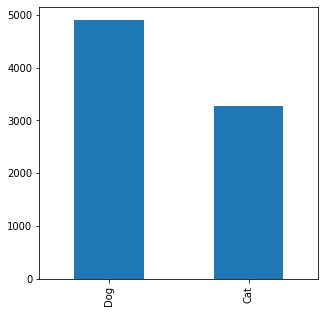

In [33]:
print(train.Type.value_counts())
train['Type'].value_counts().plot(kind='bar', figsize=(5,5))

We see that the rate of dogs in the training set is a bit higher. Though, it is not as much as we worry.

Dog    154
Cat     96
Name: Type, dtype: int64


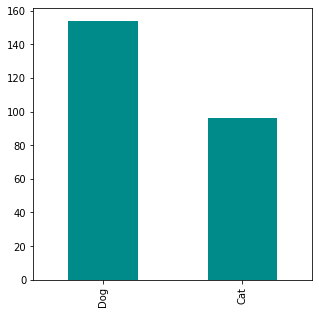

In [34]:
print(test.Type.value_counts())
test['Type'].value_counts().plot(kind='bar', figsize=(5,5), color='darkcyan')


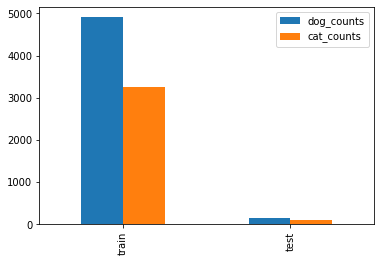

In [52]:
types= ["train", "test"]
dog_counts = [train.Type.value_counts()[0], test.Type.value_counts()[0]]
cat_counts = [train.Type.value_counts()[1], test.Type.value_counts()[1]]
df = pd.DataFrame({'dog_counts': dog_counts,'cat_counts': cat_counts}, index=types)
ax = df.plot.bar()

Let's analysize the proportion of how likely pets will get adopted in 30 days. 'True' means the pet will be adopted in 30 days and false is the opposite.

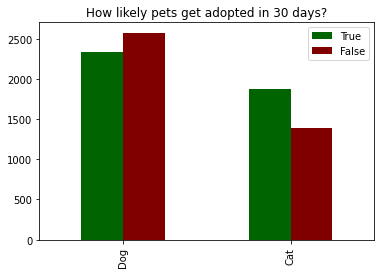

In [89]:
train_dog = train[train['Type'] == "Dog" ]
train_cat = train[train['Type'] == "Cat" ]

types= ["Dog", "Cat"]
# True = The pet can be adopted in 30 days
trues = [len(train_dog[train_dog.target== True]), 
         len(train_cat[train_cat.target== True])]
# False = The pet can be adopted in 30 days
falses = [len(train_dog[train_dog.target== False]), 
          len(train_cat[train_cat.target== False])]
df = pd.DataFrame({'True': trues,'False': falses}, index=types)
ax = df.plot.bar(color =["Darkgreen","Maroon"], 
                 title="How likely pets get adopted in 30 days?")

We see that cats are more likely to be adopted than dogs because 'True' count is greater than 'False' count in cats.

In [ ]:
df.plot(kind='bar', stacked=True)


##AGE

Now, look at Age variable

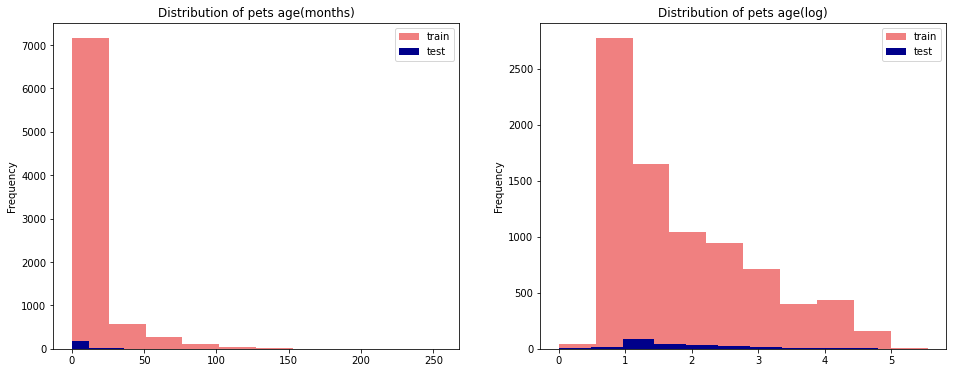

In [100]:
fig, ax = plt.subplots(figsize=(16,6))
plt.subplot(1,2,1)
plt.title("Distribution of pets age(months)")
train.Age.plot(kind='hist',label='train',color=["lightcoral"])
test.Age.plot(kind='hist',label='test',color=["darkblue"])
plt.legend()

plt.subplot(1,2,2)
plt.title("Distribution of pets age(log)")
np.log1p(train["Age"]).plot(kind='hist',label='train',color=["lightcoral"])
np.log1p(test["Age"]).plot(kind='hist',label='test',color=["darkblue"])
plt.legend()

In [104]:
train.Age.value_counts().head(10)

2.0     1769
3.0     1030
1.0     1004
4.0      618
12.0     599
24.0     407
5.0      337
6.0      336
36.0     261
8.0      199
Name: Age, dtype: int64

The age is shown in months. We can see that most pets are young in trainin dataset. Some ages are multiple of 12 that means people are not sure about pet's age.

In [105]:
test.Age.value_counts().head(10)

2.0     54
3.0     32
4.0     31
12.0    17
24.0    13
5.0     13
1.0     12
6.0     11
8.0      8
7.0      6
Name: Age, dtype: int64

The distribution of age is not so bad in testing data.

##COLOR
We have 3 color columns in data dataset and 7 different color. If the value is 'Unknow', it means there is no color.

In [107]:
colors

,ColorID,ColorName
0,1,Black
1,2,Brown
2,3,Golden
3,4,Yellow
4,5,Cream
5,6,Gray
6,7,White


In [106]:
print(train.Color1.unique())
print(train.Color2.unique())
print(train.Color3.unique())

['White' 'Golden' 'Black' 'Cream' 'Yellow' 'Brown' 'Gray']
['Unknown' 'White' 'Golden' 'Gray' 'Brown' 'Cream' 'Yellow']
['Unknown' 'White' 'Cream' 'Gray' 'Golden' 'Yellow']


###### Colors in training dataset

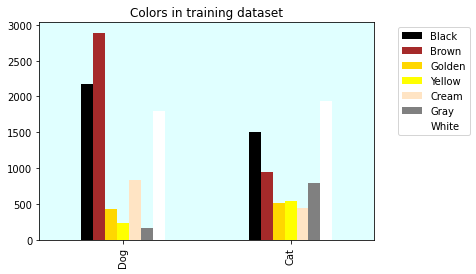

In [154]:
train_dog = train[train['Type'] == "Dog" ]
train_cat = train[train['Type'] == "Cat" ]
types= ["Dog", "Cat"]
Black = [len(train_dog[train_dog.Color1== 'Black'])+
         len(train_dog[train_dog.Color2== 'Black'])+
         len(train_dog[train_dog.Color3== 'Black']), 
         len(train_cat[train_cat.Color1== 'Black'])+
         len(train_cat[train_cat.Color2== 'Black'])+
         len(train_cat[train_cat.Color3== 'Black'])]

Brown = [len(train_dog[train_dog.Color1== 'Brown'])+
         len(train_dog[train_dog.Color2== 'Brown'])+
         len(train_dog[train_dog.Color3== 'Brown']), 
         len(train_cat[train_cat.Color1== 'Brown'])+
         len(train_cat[train_cat.Color2== 'Brown'])+
         len(train_cat[train_cat.Color3== 'Brown'])]

Golden = [len(train_dog[train_dog.Color1== 'Golden'])+
         len(train_dog[train_dog.Color2== 'Golden'])+
         len(train_dog[train_dog.Color3== 'Golden']), 
         len(train_cat[train_cat.Color1== 'Golden'])+
         len(train_cat[train_cat.Color2== 'Golden'])+
         len(train_cat[train_cat.Color3== 'Golden'])]

Yellow = [len(train_dog[train_dog.Color1== 'Yellow'])+
         len(train_dog[train_dog.Color2== 'Yellow'])+
         len(train_dog[train_dog.Color3== 'Yellow']), 
         len(train_cat[train_cat.Color1== 'Yellow'])+
         len(train_cat[train_cat.Color2== 'Yellow'])+
         len(train_cat[train_cat.Color3== 'Yellow'])]

Cream = [len(train_dog[train_dog.Color1== 'Cream'])+
         len(train_dog[train_dog.Color2== 'Cream'])+
         len(train_dog[train_dog.Color3== 'Cream']), 
         len(train_cat[train_cat.Color1== 'Cream'])+
         len(train_cat[train_cat.Color2== 'Cream'])+
         len(train_cat[train_cat.Color3== 'Cream'])]

Gray = [len(train_dog[train_dog.Color1== 'Gray'])+
         len(train_dog[train_dog.Color2== 'Gray'])+
         len(train_dog[train_dog.Color3== 'Gray']), 
         len(train_cat[train_cat.Color1== 'Gray'])+
         len(train_cat[train_cat.Color2== 'Gray'])+
         len(train_cat[train_cat.Color3== 'Gray'])]

White = [len(train_dog[train_dog.Color1== 'White'])+
         len(train_dog[train_dog.Color2== 'White'])+
         len(train_dog[train_dog.Color3== 'White']), 
         len(train_cat[train_cat.Color1== 'White'])+
         len(train_cat[train_cat.Color2== 'White'])+
         len(train_cat[train_cat.Color3== 'White'])]
df = pd.DataFrame({'Black': Black,'Brown': Brown,'Golden': Golden,
                   'Yellow': Yellow,'Cream': Cream,'Gray': Gray,
                   'White': White}, index=types)

ax = df.plot(kind='bar', color =["Black",'Brown','gold','Yellow','bisque',
                         'Gray','White'], 
                 title="Colors in training dataset")
ax.legend(bbox_to_anchor=(1.3, 1))
ax.set_facecolor('lightcyan')

We see that brown, white and black are most popular colors in both cats and dogs. 




###### Colors in training dataset

Now let's see the colors in testing data:

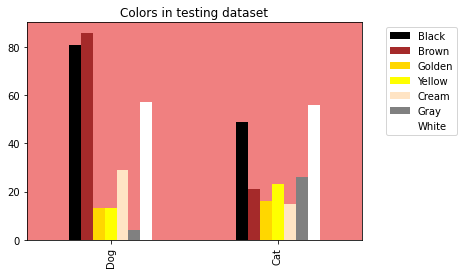

In [155]:
test_dog = test[test['Type'] == "Dog" ]
test_cat = test[test['Type'] == "Cat" ]
types= ["Dog", "Cat"]
Black = [len(test_dog[test_dog.Color1== 'Black'])+
         len(test_dog[test_dog.Color2== 'Black'])+
         len(test_dog[test_dog.Color3== 'Black']), 
         len(test_cat[test_cat.Color1== 'Black'])+
         len(test_cat[test_cat.Color2== 'Black'])+
         len(test_cat[test_cat.Color3== 'Black'])]

Brown = [len(test_dog[test_dog.Color1== 'Brown'])+
         len(test_dog[test_dog.Color2== 'Brown'])+
         len(test_dog[test_dog.Color3== 'Brown']), 
         len(test_cat[test_cat.Color1== 'Brown'])+
         len(test_cat[test_cat.Color2== 'Brown'])+
         len(test_cat[test_cat.Color3== 'Brown'])]

Golden = [len(test_dog[test_dog.Color1== 'Golden'])+
         len(test_dog[test_dog.Color2== 'Golden'])+
         len(test_dog[test_dog.Color3== 'Golden']), 
         len(test_cat[test_cat.Color1== 'Golden'])+
         len(test_cat[test_cat.Color2== 'Golden'])+
         len(test_cat[test_cat.Color3== 'Golden'])]

Yellow = [len(test_dog[test_dog.Color1== 'Yellow'])+
         len(test_dog[test_dog.Color2== 'Yellow'])+
         len(test_dog[test_dog.Color3== 'Yellow']), 
         len(test_cat[test_cat.Color1== 'Yellow'])+
         len(test_cat[test_cat.Color2== 'Yellow'])+
         len(test_cat[test_cat.Color3== 'Yellow'])]

Cream = [len(test_dog[test_dog.Color1== 'Cream'])+
         len(test_dog[test_dog.Color2== 'Cream'])+
         len(test_dog[test_dog.Color3== 'Cream']), 
         len(test_cat[test_cat.Color1== 'Cream'])+
         len(test_cat[test_cat.Color2== 'Cream'])+
         len(test_cat[test_cat.Color3== 'Cream'])]

Gray = [len(test_dog[test_dog.Color1== 'Gray'])+
         len(test_dog[test_dog.Color2== 'Gray'])+
         len(test_dog[test_dog.Color3== 'Gray']), 
         len(test_cat[test_cat.Color1== 'Gray'])+
         len(test_cat[test_cat.Color2== 'Gray'])+
         len(test_cat[test_cat.Color3== 'Gray'])]

White = [len(test_dog[test_dog.Color1== 'White'])+
         len(test_dog[test_dog.Color2== 'White'])+
         len(test_dog[test_dog.Color3== 'White']), 
         len(test_cat[test_cat.Color1== 'White'])+
         len(test_cat[test_cat.Color2== 'White'])+
         len(test_cat[test_cat.Color3== 'White'])]
df = pd.DataFrame({'Black': Black,'Brown': Brown,'Golden': Golden,
                   'Yellow': Yellow,'Cream': Cream,'Gray': Gray,
                   'White': White}, index=types)

ax = df.plot(kind='bar', color =["Black",'Brown','gold','Yellow','bisque',
                         'Gray','White'], 
                 title="Colors in testing dataset")
ax.legend(bbox_to_anchor=(1.3, 1))

ax.set_facecolor('lightcoral')

The color distribution varies in testing set. Again white, brown and black are most common colors.

**IDEA:** 
If the Color1, Color2 and Color3 are correlated each other, we can remove the most correlated one. Let's test this idea and see the correlation matrix of colors:

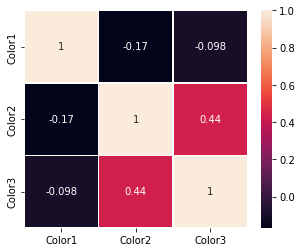

In [170]:
import seaborn as sn

cor_color= train[['Color1','Color2','Color3']].apply(lambda x : pd.factorize(x)[0]).corr(method='pearson', min_periods=1)
fig, ax = plt.subplots(figsize=(5,4))         # Sample figsize in inches
sn.heatmap(cor_color, annot=True, linewidths=.5, ax=ax)

Color2 and Color3 are correlated as 0.44 but that is not enough. We should get at least 0.80 for strong correlation. So colors are not correlated with each other.

##GENDER

Make a quick analysize for Gender

Text(0.5, 0, 'CATS')

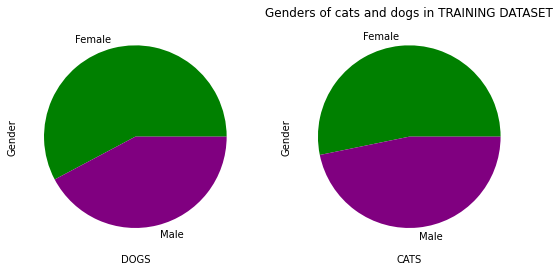

In [165]:
train_dog = train[train['Type'] == "Dog" ]
train_cat = train[train['Type'] == "Cat" ]
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(10,10))  # 1 row, 2 columns
plt.title("Genders of cats and dogs in TRAINING DATASET")
train_dog['Gender'].value_counts().plot(kind='pie', figsize=(9,9),ax=ax1,colors = ['green', 'purple'])
train_cat['Gender'].value_counts().plot(kind='pie', figsize=(9,9),ax=ax2,colors = ['green', 'purple'])
ax1.set_xlabel('DOGS')
ax2.set_xlabel('CATS')


Females and males are almost equal in cats. There are more female in dogs but not in a problematic way. Gender distributions are OK in both cats and dogs.

Now, let's see the gender proportions in testing dataset:

Text(0.5, 0, 'CATS')

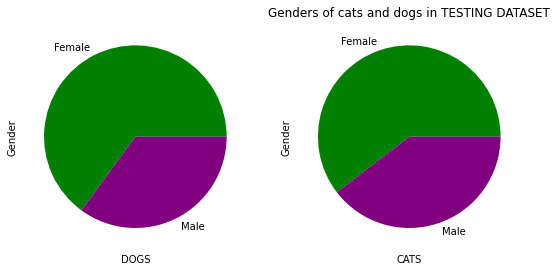

In [166]:
test_dog = test[test['Type'] == "Dog" ]
test_cat = test[test['Type'] == "Cat" ]
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(10,10))  # 1 row, 2 columns
plt.title("Genders of cats and dogs in TESTING DATASET")
test_dog['Gender'].value_counts().plot(kind='pie', figsize=(9,9),ax=ax1,colors = ['green', 'purple'])
test_cat['Gender'].value_counts().plot(kind='pie', figsize=(9,9),ax=ax2,colors = ['green', 'purple'])
ax1.set_xlabel('DOGS')
ax2.set_xlabel('CATS')

The gender distribution in test data is not bad. Females are greater in cats and dogs however the difference is not huge.

##Vaccinated, Dewormed, Sterilized and Health

Vaccination status, being dewormed,sterilization and health are important features for adoption. Let's analyse. 

First, look at the correlation matrix

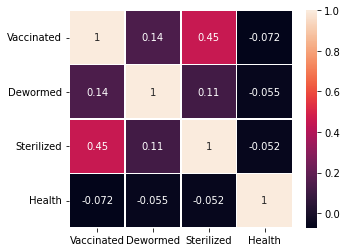

In [173]:
corr_health= train[['Vaccinated', 'Dewormed', 'Sterilized', 'Health']].apply(lambda x : pd.factorize(x)[0]).corr(method='pearson', min_periods=1)
fig, ax = plt.subplots(figsize=(5,4))        
sn.heatmap(corr_health, annot=True, linewidths=.5, ax=ax)

They are not correlated with each other at all. In my opinion, healthy pets will be adopted more. Let's test this.

There are three options in Health column: Healthy, Minor Injury and Serious Injury. 

Healthy           7873
Minor Injury       280
Serious Injury      15
Name: Health, dtype: int64


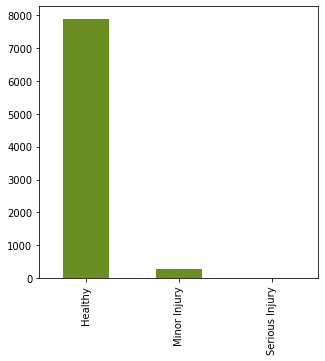

In [189]:
print(train.Health.value_counts())
train['Health'].value_counts().plot(kind='bar', figsize=(5,5), 
                                    color="olivedrab")

Most pets are healthy in the training dataset. How about test data?

Healthy         245
Minor Injury      5
Name: Health, dtype: int64


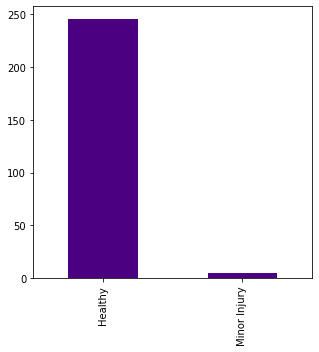

In [191]:
print(test.Health.value_counts())
test['Health'].value_counts().plot(kind='bar', figsize=(5,5), 
                                    color="indigo")

There is no 'Serious Injury' category in test data. It is ok because it is very less in the training data.

How about the Health condition and the adaptation? 

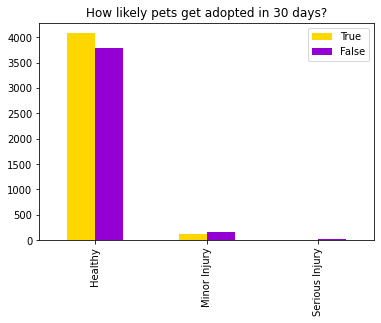

In [194]:
train_healthy = train[train['Health'] == "Healthy" ]
train_minor = train[train['Health'] == "Minor Injury" ]
train_serious = train[train['Health'] == "Serious Injury" ]

types= ["Healthy", "Minor Injury","Serious Injury"]

trues = [len(train_healthy[train_healthy.target== True]), 
         len(train_minor[train_minor.target== True]),
         len(train_serious[train_serious.target== True])]
# False = The pet can be adopted in 30 days
falses = [len(train_healthy[train_healthy.target== False]), 
         len(train_minor[train_minor.target== False]),
         len(train_serious[train_serious.target== False])]
df = pd.DataFrame({'True': trues,'False': falses}, index=types)
ax = df.plot.bar(color =["gold","darkviolet"], 
                 title="How likely pets get adopted in 30 days?")

Results show that if a pet is healthy, there is no quarantee that it will get adopted. Let's make this analysis with vaccination. There are 3 types in this column: Unknown, No, Yes.

In [197]:
train.Vaccinated.value_counts()

Yes        3742
No         3409
Unknown    1017
Name: Vaccinated, dtype: int64

Let's plot these 3 types and see how the pets' adaption is affected:

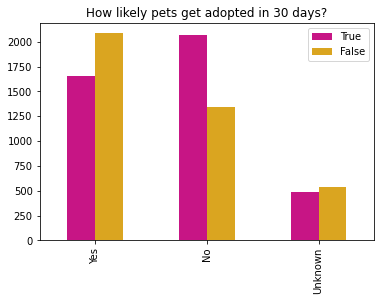

In [200]:
train_vac = train[train['Vaccinated'] == "Yes" ]
train_not_vac = train[train['Vaccinated'] == "No" ]
train_unknown = train[train['Vaccinated'] == "Unknown" ]

types= ["Yes", "No","Unknown"]

trues = [len(train_vac[train_vac.target== True]), 
         len(train_not_vac[train_not_vac.target== True]),
         len(train_unknown[train_unknown.target== True])]
# False = The pet can be adopted in 30 days
falses = [len(train_vac[train_vac.target== False]), 
         len(train_not_vac[train_not_vac.target== False]),
         len(train_unknown[train_unknown.target== False])]
df = pd.DataFrame({'True': trues,'False': falses}, index=types)
ax = df.plot.bar(color =["mediumvioletred","goldenrod"], 
                 title="How likely pets get adopted in 30 days?")

Interestingly people prefer not-vaccinated pets more. Maybe they want to start vaccination from zero and take them to vets themselves.

##BREED